# Handwritten Digit Recognition
- Author = Amitrajit Bose
- Dataset = MNIST
- [Medium Article Link](https://medium.com/@amitrajit_bose/handwritten-digit-mnist-pytorch-977b5338e627)
- Frameworks = PyTorch

Torch Requirements:
Mac

`brew install readline xz`

Ubuntu

`sudo apt-get install liblzma-dev`

Centos

`yum install -y xz-devel`

### Necessary Imports

In [16]:
# Import necessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import matplotlib.pyplot as plt
from time import time
import os

### Download The Dataset & Define The Transforms

In [17]:
### Run this cell

from torchvision import datasets
from torchvision.transforms import v2

# Define a transform to normalize the data
transform = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize((0.5,), (0.5,)),
])

# Download and load the training data
trainset = datasets.MNIST('data/mnist/MNIST_data/', download=True, train=True, transform=transform)
valset = datasets.MNIST('data/mnist/MNIST_data/', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

### Exploring The Data

In [18]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


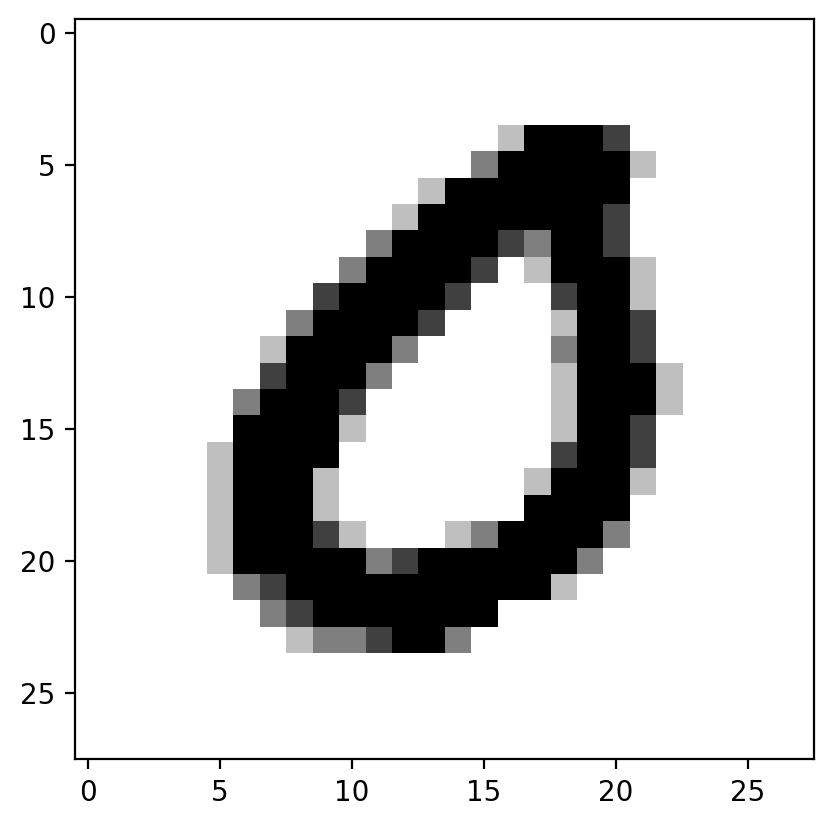

In [19]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

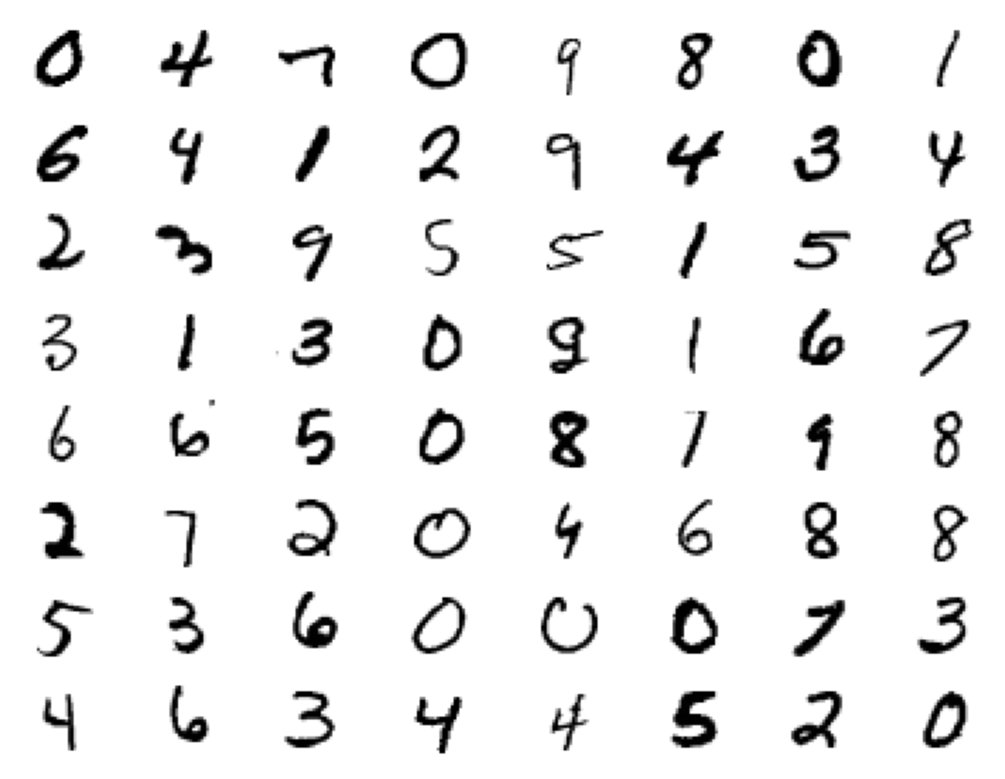

In [20]:
figure = plt.figure()
num_of_images = 64
for index in range(0, num_of_images):
    plt.subplot(8, 8, index+1)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

### Defining The Neural Network

![](https://raw.githubusercontent.com/dmlc/web-data/master/mxnet/image/mlp_mnist.png)

In [21]:
from torch import nn

# Layer details for the neural network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [22]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [23]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-6.9927e-04, -6.9927e-04, -6.9927e-04,  ..., -6.9927e-04,
         -6.9927e-04, -6.9927e-04],
        [ 1.1446e-03,  1.1446e-03,  1.1446e-03,  ...,  1.1446e-03,
          1.1446e-03,  1.1446e-03],
        [-1.0153e-03, -1.0153e-03, -1.0153e-03,  ..., -1.0153e-03,
         -1.0153e-03, -1.0153e-03],
        ...,
        [ 3.5165e-04,  3.5165e-04,  3.5165e-04,  ...,  3.5165e-04,
          3.5165e-04,  3.5165e-04],
        [-2.8184e-03, -2.8184e-03, -2.8184e-03,  ..., -2.8184e-03,
         -2.8184e-03, -2.8184e-03],
        [-7.0513e-05, -7.0513e-05, -7.0513e-05,  ..., -7.0513e-05,
         -7.0513e-05, -7.0513e-05]])


In [24]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [25]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[-0.0186, -0.0159, -0.0107,  ...,  0.0054,  0.0165, -0.0193],
        [-0.0356, -0.0031, -0.0300,  ..., -0.0015,  0.0335, -0.0250],
        [-0.0127,  0.0310, -0.0211,  ...,  0.0019,  0.0098,  0.0315],
        ...,
        [ 0.0277,  0.0265, -0.0280,  ..., -0.0270,  0.0123, -0.0153],
        [ 0.0047,  0.0342,  0.0108,  ...,  0.0245,  0.0098,  0.0336],
        [-0.0124, -0.0331, -0.0174,  ...,  0.0273,  0.0093, -0.0037]],
       requires_grad=True)
Gradient - tensor([[-1.4281e-03, -1.4281e-03, -1.4281e-03,  ..., -1.4281e-03,
         -1.4281e-03, -1.4281e-03],
        [ 2.3996e-03,  2.3996e-03,  2.3996e-03,  ...,  2.3996e-03,
          2.3996e-03,  2.3996e-03],
        [ 3.4673e-03,  3.4673e-03,  3.4673e-03,  ...,  3.4673e-03,
          3.4673e-03,  3.4673e-03],
        ...,
        [-1.4448e-03, -1.4448e-03, -1.4448e-03,  ..., -1.4448e-03,
         -1.4448e-03, -1.4448e-03],
        [-1.9981e-03, -1.9981e-03, -1.9981e-03,  ..., -1.9981e

In [26]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[-0.0186, -0.0159, -0.0107,  ...,  0.0054,  0.0165, -0.0192],
        [-0.0356, -0.0031, -0.0301,  ..., -0.0015,  0.0335, -0.0250],
        [-0.0127,  0.0310, -0.0211,  ...,  0.0019,  0.0097,  0.0314],
        ...,
        [ 0.0277,  0.0265, -0.0279,  ..., -0.0270,  0.0123, -0.0153],
        [ 0.0047,  0.0342,  0.0108,  ...,  0.0245,  0.0098,  0.0336],
        [-0.0124, -0.0331, -0.0174,  ...,  0.0273,  0.0093, -0.0037]],
       requires_grad=True)


### Core Training Of Neural Network

In [27]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)


Epoch 0 - Training loss: 0.6461046382721299
Epoch 1 - Training loss: 0.2877383254476384
Epoch 2 - Training loss: 0.22090541360093585
Epoch 3 - Training loss: 0.1789683215756978
Epoch 4 - Training loss: 0.14829502183832785
Epoch 5 - Training loss: 0.1276649832308515
Epoch 6 - Training loss: 0.11085147947184186
Epoch 7 - Training loss: 0.0984510160587442
Epoch 8 - Training loss: 0.08876347940153023
Epoch 9 - Training loss: 0.08060078435579437
Epoch 10 - Training loss: 0.07170160014682742
Epoch 11 - Training loss: 0.06697785780518882
Epoch 12 - Training loss: 0.060592716808484465
Epoch 13 - Training loss: 0.0564519243969171
Epoch 14 - Training loss: 0.051335491820363635

Training Time (in minutes) = 0.9336791674296061


In [28]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 7


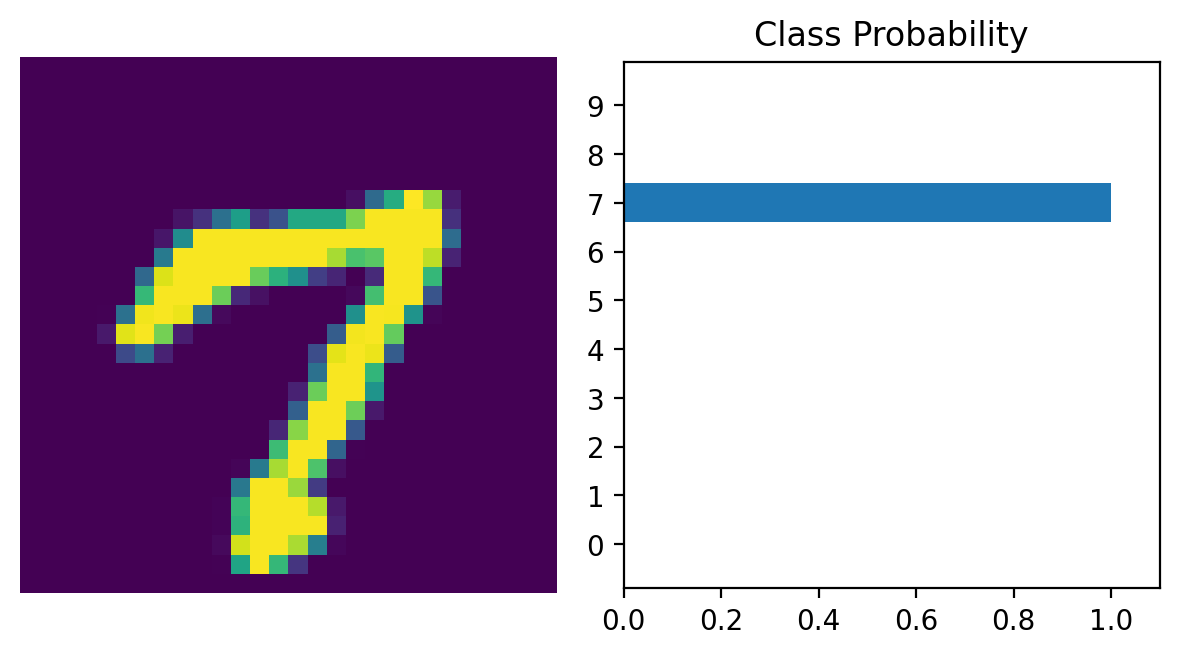

In [29]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

### Model Evaluation

In [30]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9754
